In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#website_url = "https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies"
website_HTML = requests.get(website_url).text
soup = BeautifulSoup(website_HTML, 'lxml')
valuationTable = soup.find_all('table', {'class':'wikitable sortable'})
unicornTable = valuationTable[0]
pastUnicornTable = valuationTable[1]

In [2]:
website_url = "https://www.makemytrip.com/hotels/hotel-listing/?checkin=05052020&city=CTGOI&checkout=05062020&roomStayQualifier=2e0e&locusId=CTGOI&country=IN&locusType=city&searchText=Goa,%20India&visitorId=9e3852e0-4e14-4b50-8625-d0c462dad288"

In [ ]:
website_HTML = requests.get(website_url).text


In [3]:
def findDFfromTable(table):
    rows = table.findAll('tr')
    parsed_table_data = []
    for row in rows:
        children = row.findChildren(recursive=False)
        row_text = []
        for child in children:
            clean_text = child.text
            #This is to discard reference/citation links
            clean_text = clean_text.split('&#91;')[0]
            #This is to clean the header row of the sort icons
            clean_text = clean_text.split('&#160;')[-1]
            clean_text = clean_text.strip()
            row_text.append(clean_text)
        parsed_table_data.append(row_text)
    
    df = pd.DataFrame.from_records(parsed_table_data)
    return df

In [4]:
unicornDF = findDFfromTable(unicornTable)

In [5]:
unicornDF.columns = ['Company', 'Valuation (US $billion)', 'Valuation Date', 'Country']
unicornDF = unicornDF.drop(0)
unicornDF.head(20)

,Company,Valuation (US $billion),Valuation Date,Country
1,Ant Financial,150,April 2018[10],China
2,Bytedance,78.0,November 2018[11],China
3,DiDi,51.6,December 2018[12],China
4,Airbnb,38.0,March 2018[13],US
5,Stripe,35.0,September 2019[14],US
6,SpaceX,33.3,May 2019[15],US
7,Lufax,30.0,June 2018[16],China
8,JUUL Labs,24.0,October 2019[17],US
9,Cainiao,20.0,September 2017[16],China
10,Palantir Technologies,20.0,November 2018[18],US


In [6]:
print(unicornDF.shape)
unicornDF = unicornDF.drop_duplicates()
print(unicornDF.shape)

(345, 4)
(345, 4)


In [7]:
pastUnicornDF = findDFfromTable(pastUnicornTable)

In [8]:
pastUnicornDF.columns = ['Company', 'Last Valuation (US $B)', 'Valuation Date', 'Exit Date', 'Exit Reason', 'Exit Valuation(US $B)', 'Country']
pastUnicornDF = pastUnicornDF.drop(0)
pastUnicornDF.head()

,Company,Last Valuation (US $B),Valuation Date,Exit Date,Exit Reason,Exit Valuation(US $B),Country
1,Uber,72,August 2018[234],May 2019[235],IPO,82.4,US
2,Facebook,50,January 2011,May 2012[citation needed],IPO,104,US
3,Xiaomi,45,April 2015,July 2018[citation needed],IPO,70,China
4,Alibaba,42,June 2016,September 2014[citation needed],IPO,238,China
5,Meituan-Dianping,30.0,October 2017[16],September 2018[236],IPO,53,China


In [9]:
print("Unicorn in China", unicornDF[unicornDF['Country']=="China"].shape[0])
print("Unicorn in India", unicornDF[unicornDF['Country']=="India"].shape[0])
print("Unicorn in USA", unicornDF[unicornDF['Country']=="USA"].shape[0])

Unicorn in China 122
Unicorn in India 23
Unicorn in USA 0


In [10]:
unicornDF['Country'].value_counts().head(15)

US             124
China          122
India           23
South Korea     11
UK              11
Israel           5
Indonesia        5
Hong Kong        3
Switzerland      3
France           3
Germany          2
Sweden           2
Luxembourg       2
India /  US      2
Australia        2
Name: Country, dtype: int64

In [11]:
unicornDF['Valuation (US $billion)'].unique()

array(['150', '78.0', '51.6', '38.0', '35.0', '33.3', '30.0', '24.0',
       '20.0', '18.0', '15.0', '13.0', '11.0+', '10.77', '10.0+', '10.0',
       '9.23', '9.0', '8.8', '8.0', '7.6', '7.3', '7.1', '7.0', '7',
       '6.5', '6.4', '6.2', '5.5', '5.4', '5.0+', '5.0', '4.5', '4.4',
       '4.3', '4.2', '4.05', '4.0+', '4.0', '3.95', '3.8', '3.7', '3.65',
       '3.55', '3.5', '3.3', '3.25', '3.2', '3.17', '3+', '3.0', '2.9',
       '2.8', '2.775', '2.75', '2.7', '2.65', '2.6', '2.55', '2.5', '2.4',
       '2.39', '2.32', '2.19', '2.2', '2.1', '2.09', '2.0+', '2.0',
       '2.0-', '1.98', '1.95', '1.94', '1.93', '1.9', '1.89', '1.85',
       '1.82', '1.8', '1.78', '1.75', '1.7', '1.6', '1.5+', '1.5', '1.47',
       '1.46', '1.45', '1.4', '1.33', '1.32', '1.3', '1.28', '1.27',
       '1.26', '1.25', '1.2', '1.16', '1.13', '1.1', '1.05', '1.095', '1',
       '1.04', '1+', '1.0', '5+'], dtype=object)

In [12]:
unicornDF['Valuation (US $billion)'] = unicornDF['Valuation (US $billion)'].map(lambda x: x.rstrip('+-'))
unicornDF['Valuation (US $billion)'] = unicornDF['Valuation (US $billion)'].astype(float)

In [13]:
top20Valued = unicornDF.sort_values('Valuation (US $billion)', ascending = False).head(20)
top20Valued

,Company,Valuation (US $billion),Valuation Date,Country
1,Ant Financial,150.00,April 2018[10],China
2,Bytedance,78.00,November 2018[11],China
3,DiDi,51.60,December 2018[12],China
4,Airbnb,38.00,March 2018[13],US
5,Stripe,35.00,September 2019[14],US
6,SpaceX,33.30,May 2019[15],US
7,Lufax,30.00,June 2018[16],China
8,JUUL Labs,24.00,October 2019[17],US
9,Cainiao,20.00,September 2017[16],China
10,Palantir Technologies,20.00,November 2018[18],US


In [14]:
top20Valued['Country'].value_counts()

China        9
US           7
India        2
Singapore    1
Brazil       1
Name: Country, dtype: int64

In [15]:
#Total Unique countries 
len(unicornDF['Country'].unique())

37

1. Maximum Number of Unicorns with Valuation: 
2. Mode of Valuations:
3. Median Valuation of Unicorns:
4. Valuation Distributions of Unicorns: x = unicornDF['Valuation (US $billion)'].value_counts()

In [109]:
df = pd.read_excel('CB-Insights_Global-Unicorn-Club_2019.xlsx')

In [110]:
df.head()

,Company,Valuation ($B),Country,Category,Select Investors
0,Toutiao (Bytedance),75.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,56.00,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
2,JUUL Labs,50.00,United States,Consumer & retail,Tiger Global Management
3,SpaceX,33.30,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
4,Stripe,35.25,United States,Fintech,"Khosla Ventures, Lowercase Capital, capitalG"


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
Company             433 non-null object
Valuation ($B)      433 non-null float64
Country             433 non-null object
Category            433 non-null object
Select Investors    432 non-null object
dtypes: float64(1), object(4)
memory usage: 17.0+ KB


In [4]:
df['Category'].unique()

array(['Artificial intelligence', 'Auto & transportation',
       'Consumer & retail', 'Other', 'Fintech', 'Travel',
       'Mobile & telecommunications', 'Hardware',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Health',
       'E-commerce & direct-to-consumer', 'Internet software & services',
       'Cybersecurity', 'Edtech', 'Education'], dtype=object)

/Users/prakrast/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


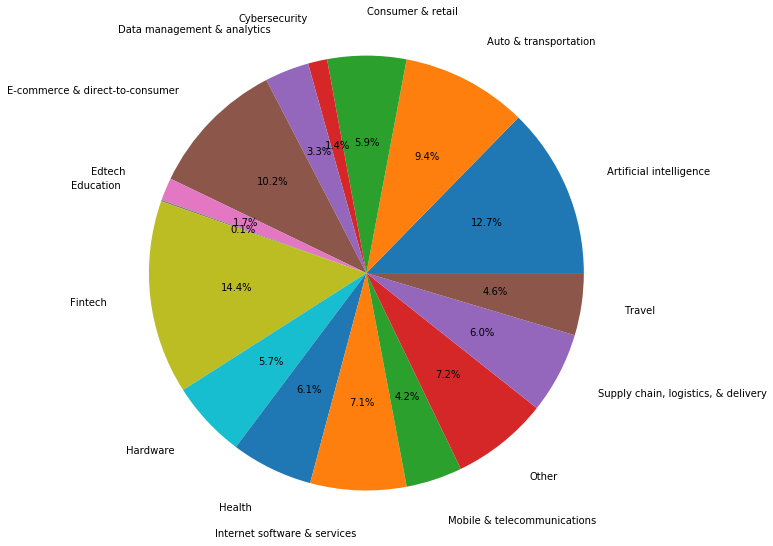

In [82]:
import matplotlib.pyplot as plt
plot = plt.pie(df.groupby('Category').sum(), explode=None, labels=df.groupby('Category').sum().index, colors=None, pctdistance=0.6, shadow=False, labeldistance=1.2, radius=2.5, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, data=None, autopct='%1.1f%%')
#plot = df.groupby('Category').sum().plot.pie(subplots = True, figsize=(8, 8), legend = False)

In [105]:
%matplotlib inline

In [121]:
#Plot a country-wise sum of valuation of unicorns
#df.plot.bar(df.groupby('Country').sum().index, height = df.groupby('Country').sum())

In [132]:
#Highest Valued Unicorn
df.sort_values(by = 'Valuation ($B)', inplace =True, na_position = 'last')

KeyError: 'Valuation ($B)'

In [ ]:
#Highest Valued Country is investing in which sectors and what amount(percentage as well)

In [133]:
df.head()

,Company,Valuation ($B),Country,Category,Select Investors
90,Canva,3.20,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
285,Judo Capital,1.04,Australia,Other,"Credit Suisse, OPTrust, Ironbridge Capital"
373,Airwallex,1.00,Australia,Fintech,"DST Global, Sequoia Capital China, Tencent Hol..."
413,QuintoAndar,1.00,Brazil,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group"
390,Loggi,1.00,Brazil,"Supply chain, logistics, & delivery","Qualcomm Ventures, SoftBank Group. Monashees+"


In [19]:
df['Category'].value_counts()

Fintech                                57
Internet software & services           53
E-commerce & direct-to-consumer        53
Artificial intelligence                46
Health                                 32
Other                                  29
Supply chain, logistics, & delivery    28
Auto & transportation                  25
Mobile & telecommunications            23
Consumer & retail                      17
Data management & analytics            17
Hardware                               16
Travel                                 13
Edtech                                 12
Cybersecurity                          11
Education                               1
Name: Category, dtype: int64

In [30]:
df[(df['Category']=='Fintech') & (df['Country']=='United States')].count()

Company             30
Valuation ($B)      30
Country             30
Category            30
Select Investors    30
dtype: int64

In [31]:
df[(df['Category']=='Fintech') & (df['Country']=='United States')].sort_values('Category')

,Company,Valuation ($B),Country,Category,Select Investors
4,Stripe,35.25,United States,Fintech,"Khosla Ventures, Lowercase Capital, capitalG"
407,C2FO,1.00,United States,Fintech,"Union Square Ventures, Summerhill Venture Part..."
406,Ibotta,1.00,United States,Fintech,"Koch Disruptive Technologies, Teamworthy Ventu..."
401,Hippo,1.00,United States,Fintech,"Propel Venture Partners, Horizons Ventures, Co..."
368,Tresata,1.00,United States,Fintech,GCP Capital Partners
323,Payoneer,1.00,United States,Fintech,"Susquehanna Growth Equity, 83North, China Broa..."
306,Kabbage,1.00,United States,Fintech,"BlueRun Ventures, SV Angel, Mohr Davidow Ventures"
273,Ivalua,1.10,United States,Fintech,"Ardian, Tiger Global Management, KKR"
270,Tradeshift,1.10,United States,Fintech,"Notion Capital, Scentan Ventures, Kite Ventures"
256,Figure Technologies,1.20,United States,Fintech,"DCM Ventures, Ribbit Capital, RPM Ventures"


In [33]:
df[df['Valuation ($B) ']>=1].count()

Company             433
Valuation ($B)      433
Country             433
Category            433
Select Investors    432
dtype: int64

In [34]:
df.count()

Company             433
Valuation ($B)      433
Country             433
Category            433
Select Investors    432
dtype: int64

In [17]:
df = df.rename(columns={"Select Investors": "Investors"})

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
Company            433 non-null object
Valuation ($B)     433 non-null float64
Country            433 non-null object
Category           433 non-null object
Investors          432 non-null object
dtypes: float64(1), object(4)
memory usage: 17.0+ KB


In [88]:
df[df.isnull().values]

,Company,Valuation ($B),Country,Category,Investors
365,LinkSure Network,1.0,China,Mobile & telecommunications,NaN


In [89]:
df = df.dropna()

In [90]:
df[df.isnull().values]

,Company,Valuation ($B),Country,Category,Investors


In [91]:
investorList = df.Investors.str.split(', ').to_list()

In [166]:
newDf = pd.DataFrame(investorList, index = df.Company).stack()

In [167]:
newDf = newDf.reset_index([0, 'Company'])

In [168]:
newDf 

,Company,0
0,Toutiao (Bytedance),Sequoia Capital China
1,Toutiao (Bytedance),SIG Asia Investments
2,Toutiao (Bytedance),Sina Weibo
3,Toutiao (Bytedance),Softbank Group
4,Didi Chuxing,Matrix Partners
...,...,...
1181,Bright Health,Bessemer Venture Partners
1182,Bright Health,Flare Capital Partners
1183,Glovo,IDInvest Partners
1184,Glovo,Seaya Ventures


In [108]:
newDf.columns = ['Company', 'Investors']

In [109]:
newDf

,Company,Investors
0,Toutiao (Bytedance),Sequoia Capital China
1,Toutiao (Bytedance),SIG Asia Investments
2,Toutiao (Bytedance),Sina Weibo
3,Toutiao (Bytedance),Softbank Group
4,Didi Chuxing,Matrix Partners
...,...,...
1181,Bright Health,Bessemer Venture Partners
1182,Bright Health,Flare Capital Partners
1183,Glovo,IDInvest Partners
1184,Glovo,Seaya Ventures


In [169]:
df = df.rename(columns={"Investors": "Investors1"})

In [172]:
xdf = pd.merge(df, newDf, left_on='Company', right_on='Company', how='left')

In [176]:
xdf

,Company,Valuation ($B),Country,Category,Investors1,0
0,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China
1,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SIG Asia Investments
2,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sina Weibo
3,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Softbank Group
4,Didi Chuxing,56.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft...",Matrix Partners
...,...,...,...,...,...,...
1181,Bright Health,1.0,United States,Health,"New Enterprise Associates, Bessemer Venture Pa...",Bessemer Venture Partners
1182,Bright Health,1.0,United States,Health,"New Enterprise Associates, Bessemer Venture Pa...",Flare Capital Partners
1183,Glovo,1.0,Spain,"Supply chain, logistics, & delivery","IDInvest Partners, Seaya Ventures, Lakestar",IDInvest Partners
1184,Glovo,1.0,Spain,"Supply chain, logistics, & delivery","IDInvest Partners, Seaya Ventures, Lakestar",Seaya Ventures


In [177]:
xdf.columns = ['Company', 'Valuation ($B)', 'Country', 'Category', 'InvestorsList', 'Investor']

In [178]:
xdf

,Company,Valuation ($B),Country,Category,InvestorsList,Investor
0,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China
1,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SIG Asia Investments
2,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sina Weibo
3,Toutiao (Bytedance),75.0,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Softbank Group
4,Didi Chuxing,56.0,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft...",Matrix Partners
...,...,...,...,...,...,...
1181,Bright Health,1.0,United States,Health,"New Enterprise Associates, Bessemer Venture Pa...",Bessemer Venture Partners
1182,Bright Health,1.0,United States,Health,"New Enterprise Associates, Bessemer Venture Pa...",Flare Capital Partners
1183,Glovo,1.0,Spain,"Supply chain, logistics, & delivery","IDInvest Partners, Seaya Ventures, Lakestar",IDInvest Partners
1184,Glovo,1.0,Spain,"Supply chain, logistics, & delivery","IDInvest Partners, Seaya Ventures, Lakestar",Seaya Ventures


In [181]:
xdf[(xdf['Investor']=="Sequoia Capital") & (xdf['Country']=="China")]

,Company,Valuation ($B),Country,Category,InvestorsList,Investor
18,Kuaishou,18.0,China,Mobile & telecommunications,"Morningside Venture Capital, Sequoia Capital, ...",Sequoia Capital
27,DJI Innovations,15.0,China,Hardware,"Accel Partners, Sequoia Capital",Sequoia Capital


In [185]:
xdf['Category'][(xdf['Investor']=="Sequoia Capital")].value_counts()

Data management & analytics            5
E-commerce & direct-to-consumer        4
Supply chain, logistics, & delivery    3
Internet software & services           2
Fintech                                2
Hardware                               2
Auto & transportation                  2
Health                                 1
Mobile & telecommunications            1
Other                                  1
Artificial intelligence                1
Name: Category, dtype: int64

In [186]:
xdf['Category'][(xdf['Investor']=="Sequoia Capital")].unique()

array(['Mobile & telecommunications', 'Hardware',
       'Supply chain, logistics, & delivery', 'Fintech',
       'E-commerce & direct-to-consumer', 'Auto & transportation',
       'Other', 'Data management & analytics',
       'Internet software & services', 'Health',
       'Artificial intelligence'], dtype=object)

In [194]:
xdf[(xdf['Investor']=="Sequoia Capital")].groupby(['Category']).sum()

,Valuation ($B)
Category,
Artificial intelligence,1.00
Auto & transportation,9.10
Data management & analytics,7.00
E-commerce & direct-to-consumer,16.59
Fintech,15.50
Hardware,17.40
Health,1.20
Internet software & services,3.98
Mobile & telecommunications,18.00


In [137]:
AllInvestors = newDf['Investors'].unique()

In [138]:
AllInvestors.sort()

In [139]:
AllInvestors

array(['500 Startups', '58.com', '83North', '8VC',
       'A&E Television Networks', 'A&NN', 'AID Partners',
       'AME Cloud Ventures', 'ARCH Venture Partners', 'Accel',
       'Accel India', 'Accel Partners', 'Accenture', 'Access Industries',
       'Accomplice', 'Activant Capital Group', 'Advantech Capital',
       'Advent International', 'Aeris Capital,', 'Aglae Ventures',
       'Ajinomoto', 'Alaska Permanent Fund', 'Alibaba Entrepreneurs Fund',
       'Alibaba Group', 'Alibaba Pictures Group',
       'Altitude Life Science Ventures', 'Alven Capital',
       'Amadeus Capital Partners', 'Amazon', 'Andreessen Horowitz',
       'Ant Financial Services Group', 'Ardian',
       'Artemis Investment Management', 'Asian Development Bank',
       'Atlos Ventures', 'Atomico', 'August Capital',
       'Australian Future Fund', 'Aviation Industry Corporation of China',
       'Aviv Venture Capital', 'Azure Capital Partners', 'BBVA',
       'BDC Venture Capital', 'BMW i Ventures', 'BNP Pariba

In [144]:
CompanyInvested = newDf['Investors'].value_counts()

In [158]:
CompanyInvested[CompanyInvested.values>11]

Sequoia Capital              24
Sequoia Capital China        24
New Enterprise Associates    20
Tencent Holdings             19
Goldman Sachs                16
Andreessen Horowitz          16
SoftBank Group               16
Khosla Ventures              14
Tiger Global Management      14
Alibaba Group                13
Bessemer Venture Partners    13
Google Ventures              13
General Atlantic             13
Name: Investors, dtype: int64

In [164]:
newDf[newDf['Investors']=="Sequoia Capital"]

,Company,Investors
18,Kuaishou,Sequoia Capital
27,DJI Innovations,Sequoia Capital
32,DoorDash,Sequoia Capital
56,Nubank,Sequoia Capital
64,Coupang,Sequoia Capital
112,Ola Cabs,Sequoia Capital
118,Unity Technologies,Sequoia Capital
139,Klarna,Sequoia Capital
177,Houzz,Sequoia Capital
326,Confluent,Sequoia Capital


In [456]:
df.head()

,Company,Valuation ($B),Country,Category,Select Investors
0,Toutiao (Bytedance),75.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,56.00,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
2,JUUL Labs,50.00,United States,Consumer & retail,Tiger Global Management
3,SpaceX,33.30,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
4,Stripe,35.25,United States,Fintech,"Khosla Ventures, Lowercase Capital, capitalG"


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
Company             433 non-null object
Valuation ($B)      433 non-null float64
Country             433 non-null object
Category            433 non-null object
Select Investors    432 non-null object
dtypes: float64(1), object(4)
memory usage: 17.0+ KB


In [468]:
df.columns = ['Company', 'Valuation ($B)', 'Country', 'Category', 'Investors']

In [472]:
df.sort_values('Valuation ($B)', ascending = False).head(30)

,Company,Valuation ($B),Country,Category,Investors
0,Toutiao (Bytedance),75.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,56.00,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
2,JUUL Labs,50.00,United States,Consumer & retail,Tiger Global Management
4,Stripe,35.25,United States,Fintech,"Khosla Ventures, Lowercase Capital, capitalG"
5,Airbnb,35.00,United States,Travel,"General Catalyst Partners, Andreessen Horowitz..."
3,SpaceX,33.30,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
6,Kuaishou,18.00,China,Mobile & telecommunications,"Morningside Venture Capital, Sequoia Capital, ..."
7,One97 Communications,16.00,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group"
8,Epic Games,15.00,United States,Other,"Tencent Holdings, KKR, Smash Ventures"
9,DJI Innovations,15.00,China,Hardware,"Accel Partners, Sequoia Capital"


In [109]:
data[data['Country']=='China'].sum()

Company            Toutiao (Bytedance)Didi ChuxingKuaishouDJI Inn...
Valuation ($B)                                                390.08
Country            ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...
Category           Artificial intelligenceAuto & transportationMo...
dtype: object

In [143]:
website_url_data =  "https://www.cbinsights.com/research-softbank-investment-tracker"

In [144]:
website_HTML_softbank = requests.get(website_url_data).text

In [145]:
soup_softbank = BeautifulSoup(website_HTML_softbank, 'lxml')

In [152]:
softbankVisionFund = soup_softbank.find('table', {'class':'sortable-theme-bootstrap'})

In [153]:
softbankVisionFund

<table class="sortable-theme-bootstrap" data-sortable="">
<thead>
<tr>
<th>Company</th>
<th data-sorted="true" width="120"> Funding Date </th>
<th> Round </th>
<th> Round Amount ($M) </th>
<th> Sector </th>
<th> Country </th>
<th data-sortable="false">Round Investors</th>
</tr>
</thead>
<tbody>
<td>OpenDoor Labs</td>
<td>03/20/19</td>
<td>Series F</td>
<td>300</td>
<td> Internet </td>
<td>United States</td>
<td colspan="2" style="mso-ignore:colspan">SoftBank Group; Access Technology Ventures; Fifth Wall Ventures; General Atlantic; GGV Capital; Google Ventures; Hawk Equity; Khosla Ventures; Lennar; New Enterprise Associates; Norwest Venture Partners; SV Angel</td>
<td colspan="24" style="mso-ignore:colspan"></td>
<td>OneWeb</td>
<td>03/18/19</td>
<td>Unattributed - VC II</td>
<td>1,250</td>
<td> Mobile &amp; Telecommunications </td>
<td>United Kingdom</td>
<td colspan="2" style="mso-ignore:colspan">SoftBank Group; Airbus Ventures; Government of Rwanda; Grupo Salinas; Qualcomm Ventures; 

In [154]:
softbankVisionFundDf = findDFfromTable(softbankVisionFund)

In [175]:
softbankVisionFundDf.head()

,0,1,2,3,4,5,6,7
0,Company,Funding Date,Round,Round Amount ($M),Sector,Country,Round Investors,None
1,Ping An Good Doctor,02/02/18,Corporate Minority,400,Mobile Software & Services,China,SoftBank Group; Undisclosed Investors,
2,Kurashiru,01/22/18,Series B,30.2,Internet Software & Services,Japan,SoftBank Group; Akatsuki; United; YJ Capital,
3,Ping An Healthcare Management,01/18/18,Series A,1150,Insurance,China,SoftBank Group; SBI Group,
4,Uber,01/18/18,Series H,1250,Mobile & Telecommunications,United States,SoftBank Group; Dragoneer Investment Group; TP...,


In [176]:
softbankVisionFundDf.columns = ['Company', 'Funding Date', 'Round', 'Round Amount', 'Sector', 'Country', 'Round Investors', 'None']

In [181]:
softbankVisionFundDf.head()

,Company,Funding Date,Round,Round Amount,Sector,Country,Round Investors,None
0,Company,Funding Date,Round,Round Amount ($M),Sector,Country,Round Investors,None
1,Ping An Good Doctor,02/02/18,Corporate Minority,400,Mobile Software & Services,China,SoftBank Group; Undisclosed Investors,
2,Kurashiru,01/22/18,Series B,30.2,Internet Software & Services,Japan,SoftBank Group; Akatsuki; United; YJ Capital,
3,Ping An Healthcare Management,01/18/18,Series A,1150,Insurance,China,SoftBank Group; SBI Group,
4,Uber,01/18/18,Series H,1250,Mobile & Telecommunications,United States,SoftBank Group; Dragoneer Investment Group; TP...,


In [178]:
softbankVisionFundDf.drop(0)

,Company,Funding Date,Round,Round Amount,Sector,Country,Round Investors,None
1,Ping An Good Doctor,02/02/18,Corporate Minority,400,Mobile Software & Services,China,SoftBank Group; Undisclosed Investors,
2,Kurashiru,01/22/18,Series B,30.2,Internet Software & Services,Japan,SoftBank Group; Akatsuki; United; YJ Capital,
3,Ping An Healthcare Management,01/18/18,Series A,1150,Insurance,China,SoftBank Group; SBI Group,
4,Uber,01/18/18,Series H,1250,Mobile & Telecommunications,United States,SoftBank Group; Dragoneer Investment Group; TP...,
5,Auto1 Group,01/15/18,Corporate Minority,561,eCommerce,Germany,SoftBank Group,
...,...,...,...,...,...,...,...,...
105,Brightstar,10/19/13,Corporate Majority,1260,Computer Hardware & Services,United States,SoftBank Group,
106,Supercell,10/15/13,Corporate Majority,1530,Internet,Finland,GungHo OnLine Entertainment;SoftBank \nGroup,
107,Snapdeal,8/14/13,Corporate Minority,75,eCommerce,India,SoftBank Group,
108,Bloom Energy,7/19/13,Corporate Minority,75,Renewables,Japan,Bloom Energy;SoftBank Group,


In [182]:
softbankVisionFundDf = softbankVisionFundDf.drop(columns= ['None'])

In [183]:
softbankVisionFundDf.head()


,Company,Funding Date,Round,Round Amount,Sector,Country,Round Investors
0,Company,Funding Date,Round,Round Amount ($M),Sector,Country,Round Investors
1,Ping An Good Doctor,02/02/18,Corporate Minority,400,Mobile Software & Services,China,SoftBank Group; Undisclosed Investors
2,Kurashiru,01/22/18,Series B,30.2,Internet Software & Services,Japan,SoftBank Group; Akatsuki; United; YJ Capital
3,Ping An Healthcare Management,01/18/18,Series A,1150,Insurance,China,SoftBank Group; SBI Group
4,Uber,01/18/18,Series H,1250,Mobile & Telecommunications,United States,SoftBank Group; Dragoneer Investment Group; TP...


In [185]:
softbankVisionFundDf.shape

(110, 7)

In [193]:
website_url_trak_data =  "https://trak.in/india-startup-funding-investment-2015/"
website_HTML_trak = requests.get(website_url_trak_data).text
soup_trak = BeautifulSoup(website_HTML_trak, 'lxml')

In [217]:
mon = soup_trak.find_all('table', {'class':'tablepress'})

In [475]:
len(mon)


30

In [285]:
fundDf = pd.DataFrame(columns=['Date', 'Company', 'Sector', 'Sub-sector', 'City', 'Investors', 'Round', 'Funding'])
for i in mon: 
    df = findDFfromTable(i)
    #print(df.shape)
    if df.columns.size!=10:
        #print("done")
        df.columns = ['None', 'Date', 'Company', 'Sector', 'Sub-sector', 'City', 'Investors', 'Round', 'Funding']
        fundDf = fundDf.append(df)
    else:  
        df.columns = ['None', 'Date', 'Company', 'Sector', 'Sub-sector', 'City', 'Investors', 'Round', 'Funding', 'None1']
        df = df.drop(columns=["None1"])
        fundDf = fundDf.append(df)
        print(df.head(1))
        
fundDf = fundDf.drop(columns= ['None'])

      None               Date       Company               Sector  \
0  Sr. No.  Date (dd/mm/yyyy)  Startup Name  Industry / Vertical   

     Sub-sector             City        Investors            Round  \
0  Sub-Vertical  City / Location  Investors' Name  Investment Type   

           Funding  
0  Amount (In USD)  


In [286]:
fundDf.shape

(501, 8)

In [477]:
print(fundDf.shape)
fundDf = fundDf.drop_duplicates()
print(fundDf.shape)

(501, 8)
(227, 8)


In [287]:
fundDf.head()

,City,Company,Date,Funding,Investors,Round,Sector,Sub-sector
0,Bengaluru,BYJU’S,09/01/2020,"200,000,000",Tiger Global Management,Private Equity Round,E-Tech,E-learning
1,Gurgaon,Shuttl,13/01/2020,"8,048,394",Susquehanna Growth Equity,Series C,Transportation,App based shuttle service
2,Bengaluru,Mamaearth,09/01/2020,"18,358,860",Sequoia Capital India,Series B,E-commerce,Retailer of baby and toddler products
3,New Delhi,https://www.wealthbucket.in/,02/01/2020,"3,000,000",Vinod Khatumal,Pre-series A,FinTech,Online Investment
4,Mumbai,Fashor,02/01/2020,"1,800,000",Sprout Venture Partners,Seed Round,Fashion and Apparel,Embroiled Clothes For Women


In [300]:
#December 2015 
def trakData(weburl):
    website_HTML = requests.get(weburl).text
    soup = BeautifulSoup(website_HTML, 'lxml')
    month = soup.find('table')
    df = findDFfromTable(month)
    return df

In [301]:
weburl = "https://trak.in/india-startup-funding-investment-2015/december-2015/"
dec15 = trakData(weburl)

In [302]:
dec15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/12/2015,CollegeDekho,Online Education Information platform,Jaipur,GirnarSoft,Seed Funding,"1,000,000",
2,2,01/12/2015,Black White Orange Brands,Brand Licensing Startup,Mumbai,YouWeCan Ventures,Seed Funding,N/A,
3,3,01/12/2015,Biteclub,Gourmet Food Discovery & Delivery platform,Gurgaon,growX ventures,Private Equity,N/A,Pre-Series A
4,4,01/12/2015,Patel Logistics,Transportation & Logistics Platform,Mumbai,Frontline Strategy,Private Equity,"5,600,000",N/A


In [303]:
weburl = "https://trak.in/india-startup-funding-investment-2015/november-2015/"
nov15 = trakData(weburl)

In [304]:
nov15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,02/11/2015,Twigly,Online Food Ordering & Delivery platform,Gurgaon,"Amit Gupta, Sahil Barua, Mukul Singhal, Tracxn...",Seed Funding,"200,000",
2,2,02/11/2015,CityFlo,Bus Aggregation and rental mobile app,Mumbai,IDG Ventures,Seed Funding,"750,000",
3,3,03/11/2015,Findyahan,hyperlocal online Services platform,Noida,Times Group Brand Capital,Private Equity,N/A,Bridge funding
4,4,03/11/2015,Sabse,WiFi – first Cloud communication platform,Mumbai,Ratan Tata,Private Equity,N/A,N/A


In [309]:
weburl = "https://trak.in/india-startup-funding-investment-2015/october-2015/"
oct15 = trakData(weburl)

In [310]:
oct15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/10/2015,Indifi,Easy Business Loans platform,Gurgaon,"Accel Partners, Elevar Equity, Pramod Bhasin, ...",Seed Funding,N/A,
2,2,01/10/2015,Wydr,Performance based Wholesale Marketplace,New Delhi,Sandeep Aggarwal,Seed Funding,N/A,
3,3,01/10/2015,EasyFix,Professional Services Marketplace,Gurgaon,Axilor Ventures,Seed Funding,N/A,
4,4,01/10/2015,Muvizz,Movie-on-demand platform,Singapore,"Ashish Todi, Abhinav Patodia, Kumar Shwetabh",Seed Funding,"350,000",


In [311]:
weburl = "https://trak.in/india-startup-funding-investment-2015/september-2015/"
sep15 = trakData(weburl)

In [312]:
sep15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/09/2015,TOFlo,FinTech Startup Incubation platform,Mumbai,Tania Johny Palathinkal,Seed Funding,"100,000",
2,2,01/09/2015,FXMartIndia,Payment Services platform,Chandigarh,Flipkart,Private Equity,N/A,Strategic Investment (Majority Stake)
3,3,01/09/2015,Stylecracker,Personalized Styling platform,Mumbai,Group of HNI investors,Private Equity,"1,000,000",Series A
4,4,01/09/2015,Luxuryhues,Luxury goods Shopping Platform,Gurgaon,Reliance Capital,Private Equity,"900,000",Series A


In [314]:
weburl = "https://trak.in/india-startup-funding-investment-2015/august-2015/"
aug15 = trakData(weburl)

In [315]:
aug15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details)
2,2,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",
3,3,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,N/A,
4,4,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A


In [316]:
weburl = "https://trak.in/india-startup-funding-investment-2015/july-2015/"
jul15 = trakData(weburl)

In [317]:
jul15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/07/2015,Parcelled,Online Logistics Platform,Bangalore,"Delhivery, Tracxn Labs",Seed Funding,N/A,
2,2,01/07/2015,Retigence Technologies,Business IT Intelligence Services,Mumbai,Omnivore Partners,Private Equity,N/A,Series A
3,3,01/07/2015,Cloudcherry Analytics,CRM / Analytics platform,Chennai,"The Chennai Angels, IDG Ventures India",Seed Funding,"1,000,000",
4,4,01/07/015,HandyHome,Hyperlocal Electronics repair Service,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,"630,000",


In [318]:
weburl = "https://trak.in/india-startup-funding-investment-2015/may-2015/"
may15 = trakData(weburl)

In [319]:
may15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/05/2015,Foodpanda,Online Food Delivery,Gurgaon,"Goldman Sachs, Rocket Internet",Private Equity,"100,000,000",Series D
2,2,01/05/2015,Termsheet,Fund Raising Platform,Chennai,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,"100,000",
3,3,04/05/2015,Applicate,Workforce Management Software,Bangalore,"Rishi Vasudev, Amit Gupta, Rajiv Nayan",Seed Funding,"550,000",
4,4,04/05/2015,World Art Community,Online Art Marketplace,Gurgaon,Viraj Tyagi & others,Seed Funding,"200,000",


In [320]:
weburl = "https://trak.in/india-startup-funding-investment-2015/june-2015/"
jun15 = trakData(weburl)

In [321]:
jun15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,01/06/2015,Vyomo,Beauty and Wellness Platform,New Delhi,Aprameya Radhakrishna,Seed Funding,N/A,
2,2,01/06/2015,Veeba Foods,Healthy Food Manufacturer,New Delhi,"DSG Consumer Partners, Saama Capital.",Private Equity,"6,000,000",Series B
3,3,01/06/2015,Truebil,Used Car Marketplace,Mumbai,"Kae Capital, Anupam Mittal",Seed Funding,"500,000",
4,4,01/06/2015,Meritnation,Online Learning Platform,New Delhi,InfoEdge,Private Equity,"4,000,000",Series C


In [322]:
weburl = "https://trak.in/india-startup-funding-investment-2015/april-2015/"
apr15 = trakData(weburl)

In [323]:
apr15.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,03/04/2015,Swiggy,Online Food Delivery,Bangalore,"Accel Partners, SAIF Partners",Private Equity,"2,000,000",Series A
2,2,04/04/2015,Bluegape,Web Content Publishing,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,"200,000",
3,3,04/04/2015,KeepTrax,Location Based App,Dallas / Hyderabad,,Seed Funding,"1,000,000",
4,4,06/04/2015,InstaLively,Video Streaming,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,"120,000",


In [324]:
weburl = "https://trak.in/india-startup-funding-investment-2015/march-2015/"
mar15 = trakData(weburl)

In [325]:
mar15.head()

,0,1,2,3,4,5,6
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,02/03/2015,TrulyMadly.com,"Helion Venture Partners, Kae Capital",Private Equity,"5,500,000",Series A
2,2,02/03/2015,InstaLively,Group of Angel Investors,Seed Funding,"120,000",
3,3,03/03/2015,Vserv,"Maverick Capital, IDG Ventures India",Private Equity,"15,000,000",
4,4,03/03/2015,Intruo.com,"Ashutosh Lawania, Alok Goel & others",Seed Funding,N/A,


In [326]:
weburl = "https://trak.in/india-startup-funding-investment-2015/february-2015/"
feb15 = trakData(weburl)

In [327]:
feb15.head()

,0,1,2,3,4,5,6
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,02/02/2015,Faaya,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event
2,2,02/02/2015,InstaBounce,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event
3,3,02/02/2015,Chloroplast Foods,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event
4,4,02/02/2015,Dealwithus,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event


In [328]:
weburl = "https://trak.in/india-startup-funding-investment-2015/january-2015/"
jan15 = trakData(weburl)

In [329]:
jan15.head()

,0,1,2,3,4,5,6
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Investors’ Name,Investment\nType,Amount (in USD),Remarks
1,1,02/01/2015,LensKart,"TPG Growth, TR Capital, IDG Ventures",Private Equity,"2,150,000",
2,2,02/01/2015,VioletStreet,"Venkat Vallabhneni, Sudhakar Reddy, Srinivasa ...",Seed\nFunding,"315,000",
3,3,05/01/2015,Lookup,"DeNA Co., Japan & Teruhide Sato (in Addition t...",Seed\nFunding,"380,000",
4,4,05/01/2015,#Fame,TO THE NEW Ventures,Private Equity,"10,000,000",


In [336]:
weburl = "https://trak.in/india-startup-funding-investment-2015/january-2016/"
jan16 = trakData(weburl)

In [337]:
jan16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/1/2016,Smartcooky,ECommerce,Health Food / Personal Care Marketplace,New Delhi,"Rajan Anandan, Pramod Bhasin, Siddharth Pai, T...",Seed Funding,N/A
2,2,01/1/2016,Helpi,Consumer Internet,On Demand Cleaning Services Mobile App,Mumbai,Undisclosed Investors,Seed Funding,N/A
3,3,04/1/2016,DogSpot,ECommerce,Online Pet Store,Gurgaon,Ratan Tata,Seed Funding,N/A
4,4,04/1/2016,Career360,Education,College Education Portal,New Delhi,MeritTrac,Private Equity,N/A


In [334]:
weburl = "https://trak.in/india-startup-funding-investment-2015/january-2017/"
jan17 = trakData(weburl)

In [335]:
jan17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,02/01/2017,TaxSutra,Consumer Internet,Online Tax Filing platform,Pune,"TV Mohandas Pai, V Balakrishnan, PV Srinivasan",Seed Funding,"366,000"
2,2,03/01/2017,TempoGo,Technology,IoT & SAAS Solutions for Transportation Industry,Panaji,K2 Capital,Seed Funding,"825,000"
3,3,03/01/2017,GoFynd,ecommerce,Fashion ecommerce portal,Mumbai,"Anand Chandrasekaran, Rajiv Mehta, Ramakant Sh...",Seed Funding,N/A
4,4,03/01/2017,Vow Car Clinic,Consumer Internet,Online/App Based Car cleaning service provider,Gurgaon,Vishal Malik,Seed Funding,N/A


In [340]:
weburl = "https://trak.in/indian-startup-funding-and-investment-chart-january-2018/"
jan18 = trakData(weburl)
jan18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,2/1/2018,CleverTap,Technology,Mobile App Analytics,Mumbai,"Recruit Holdings, Sequoia Capital India, Accel...",Angel / Seed Funding,N/A
2,2,4/1/2018,EarlySalary,Finance,Online Lending,Pune,Eight Roads Ventures India,Private,"15,700,000"
3,3,5/1/2018,WOTU,E-commerce,Food and Beverages,Bengaluru,"Claris Capital, Mumbai Angels Network",Angel / Seed Funding,N/A
4,4,8/1/2018,DAAKI,E-commerce,Sports Nutrition Supplement etailer,Bengaluru,Rohan Agila,Angel / Seed Funding,N/A


In [341]:
weburl = "https://trak.in/indian-startup-funding-and-investment-chart-february-2018/"
feb18 = trakData(weburl)
feb18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,01/02/2018,BigBasket,Consumer Internet,Online Grocery & Food Store,Bengaluru,"Alibaba, Helion Venture Partners, Bessemer Ven...",Private Equity,"300,000,000"
2,2,01/02/2018,Zomato,Food and Beverages,Food Ordering and Restaurant Discovery,Gurugram,Ant Financials,Private Equity,"200,000,000"
3,3,05/02/2018,Pratilipi,Publishing,E-Publishing,Bengaluru,Omidyar Network,Private Equity,"4,300,000"
4,4,05/02/2018,Asia Institute Of Medical Science,Healthcare,Super-specialty Hospital,Faridabad,CDC Group Plc,Private Equity,"21,000,000"


In [343]:
weburl = "https://trak.in/indian-startup-funding-and-investment-chart-march-2018/"
mar18 = trakData(weburl)
mar18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,01/03/2018,PharmEasy,Consumer Internet,Online Pharmacy Store,Mumbai,Bessemer Venture Partners and Orios Venture Pa...,Private Equity,N/A
2,2,01/03/2018,Buddy4studdy,Consumer Internet,Online Scholarship Portal,Noida,CBA Capital and others,Private Equity,"3,000,000"
3,3,01/03/2018,Urban Ladder,E-Commerce,Online Furniture Store,Bengaluru,"Sequoia Capital, SAIF Partners and Kalaari cap...",Private Equity,"12,000,000"
4,4,03/03/2018,Kuvera,Consumer Internet,Online Financial Planning,Bengaluru,"Baskar Subramanian, Saket Kumar, Gaurav Suri a...",Seed / Angel Funding,"250,000"


In [345]:
weburl = "https://trak.in/indian-startup-funding-investment-chart-april-2018/"
apr18 = trakData(weburl)
apr18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,02/04/2018,Fitternity,Consumer Internet,Online Fitness Discovey Platform,Mumbai,"Exfinity Venture, Saha fund Partners, Arihant ...",Private Equity,"2,000,000"
2,2,02/04/2018,Synctag,Technology,Social Media Anlaytics Platform,Coimbatore,Subhkam Ventures and Mohit Khadaria,Seed / Angel Funding,"307,600"
3,3,02/04/2018,Benepik,Technology,Enhanced Employee Engagement Platform,Gurugram,"Vishal Bali, Yogesh Misra, Thomas Assessments ...",Seed / Angel Funding,N/A
4,4,02/04/2018,Finzy,Consumer Internet,Online Loan Matchmaking Platform,Bengaluru,N/A,Seed / Angel Funding,"13,00,000"


In [347]:
weburl = "https://trak.in/indian-startup-funding-investment-chart-may-2018/"
may18 = trakData(weburl)
may18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,02/05/2018,OpenTap,Finance,Online Lending Platform,Chennai,Unknown High Net-Worth Individuals,Seed / Angel Funding,"4,50,000"
2,2,02/05/2018,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,"2,2000,000"
3,3,03/05/2018,Disprz,IT,SaaS,Chennai,"IL&FS Private Equity, Kae Capital & Others",Seed / Angel Funding,"25,00,000"
4,4,07/05/2018,PaisaDukan,Consumer Internet,P2P Lending Platform,Mumbai,N/A,Seed / Angel Funding,"225,000"


In [348]:
weburl = "https://trak.in/indian-startup-funding-investment-chart-june-2018/"
jun18 = trakData(weburl)
jun18.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1,01/06/2018,CoinTribe,Finance,Credit-Based Lending Marketplace For Small And...,Gurugram,"Sabre Partners, Puneet Dalmia & Others",Private Equity,"10,000,000"
2,2,04/06/2018,Digiconectt,Technology,Sales Analytics and Enablement Platform,Bengaluru,Aspire Logistics LLC,Seed/ Angel Funding,"125,000"
3,3,04/06/2018,Kashmir Box,E-Commerce,"Online Marketplace For Handicrafts, Handlooms ...",Srinagar,"Bhairavi Jani, Alok Divatia, Namrata Kaul, Soh...",Seed/ Angel Funding,N/A
4,4,05/06/2018,Crowdera,Finance,Online Crowdfunding Platform,Nagpur,"Anil Advani, Pramod Jain, Amrendra Reddy and M...",Seed/ Angel Funding,N/A


In [351]:
weburl = "https://trak.in/india-startup-funding-investment-2015/february-2016/"
feb16 = trakData(weburl)
feb16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/2/2016,Blue Tokai Coffee,ECommerce,Specialty Coffee Etailer,New Delhi,Snow Leopard Technology Ventures,Seed Funding,N/A
2,2,02/2/2016,Altizone,Technology,IoT & M2M Solutions,Pune,"Wipro Ventures, Lumis Partners",Private Equity,"4,000,000"
3,3,02/2/2016,Oust App,Consumer Internet,Competitive Exam Preparation Platform,Bangalore,"T V Mohandas Pai, Aarin Capital",Seed Funding,N/A
4,4,02/2/2016,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed Funding,"22,500"


In [352]:
weburl = "https://trak.in/india-startup-funding-investment-2015/february-2016/"
feb17 = trakData(weburl)
feb17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/2/2016,Blue Tokai Coffee,ECommerce,Specialty Coffee Etailer,New Delhi,Snow Leopard Technology Ventures,Seed Funding,N/A
2,2,02/2/2016,Altizone,Technology,IoT & M2M Solutions,Pune,"Wipro Ventures, Lumis Partners",Private Equity,"4,000,000"
3,3,02/2/2016,Oust App,Consumer Internet,Competitive Exam Preparation Platform,Bangalore,"T V Mohandas Pai, Aarin Capital",Seed Funding,N/A
4,4,02/2/2016,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed Funding,"22,500"


In [354]:
weburl = "https://trak.in/india-startup-funding-investment-2015/indian-startup-funding-investment-chart-march-2016/"
mar16 = trakData(weburl)
mar16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/3/2016,DriveU,Consumer Internet,Chauffeurs Discovery for private car owners,Bangalore,Unitus Seed Fund,Seed Funding,N/A
2,2,01/3/2016,Gympik,Consumer Internet,"Fitness Centres, Gym Discovery online marketplace",Bangalore,RoundGlass Partners,Private Equity,N/A
3,3,01/3/2016,Testbook,Consumer Internet,Online Test Preparation Platform,Mumbai,S Chand & Co,Private Equity,N/A
4,4,01/3/2016,IQlect,Technology,Big Data Analytics Platform,Bangalore,"Lip-Bu Tan, Michael Marks, Nicolas Braithwaite",Private Equity,N/A


In [357]:
weburl = "https://trak.in/india-startup-funding-investment-2015/march-2017/"
mar17 = trakData(weburl)
mar17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/03/2017,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,"330,000,000"
2,2,01/03/2017,Belong,Consumer Internet,Online Jon Portal,Bangalore,Sequoia Capital India,Private Equity,"10,000,000"
3,3,01/03/2017,Seenit,Consumer Internet,AI based Fashion Search Portal,Kolkata,"Calcutta Angels Network (CAN), Augment Ventures",Seed Funding,N/A
4,4,01/03/2017,Paalak,ECommerce,Fresh Produce Selling portal,New Delhi,"Vishwadeep Bajaj, Harsh Kundra, Nandkumar Rane...",Seed Funding,N/A


In [358]:
weburl = "https://trak.in/india-startup-funding-investment-2015/april-2016/"
apr16 = trakData(weburl)
apr16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/4/2016,Dil Mil,Consumer Internet,Matchmaking Mobile App,SFO / Bangalore,"Nelstone Ventures, Transmedia Capital, Maiden ...",Private Equity,"2,700,000"
2,2,01/4/2016,PicsDream,Consumer Internet,Online Marketplace for Photographers,Delhi,Raman Roy,Seed Funding,N/A
3,3,01/4/2016,Process 9,Consumer Internet,online translation and transliteration,Gurgaon,"Indian Angel Network, Alok Sharma, Kris Gopala...",Seed Funding,N/A
4,4,04/4/2016,Housing,Consumer Internet,Real Estate Portal,Mumbai,Vineet Singh,Private Equity,N/A


In [359]:
weburl = "https://trak.in/india-startup-funding-investment-2015/april-2017/"
apr17 = trakData(weburl)
apr17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD)
1,1,01/04/2017,Cashe,Consumer Internet,Online & Mobile based Lending platform,Mumbai,"Mathew Cyriac, Florintree Advisors,",Private Equity,"3,800,000"
2,2,03/04/2017,Eruditus,Education,Executive Education Provider,Mumbai,Bertelsmann India,Private Equity,"8,200,000"
3,3,03/04/2017,TestBook,Consumer Internet,Online Test Preparation Platform,Mumbai,Matrix Partners India,Private Equity,N/A
4,4,03/04/2017,Healthcare at Home,Healthcare,Home Healthcare Provider,Noida,Quadria Capital Advisors,Private Equity,"40,000,000"


In [360]:
weburl = "https://trak.in/india-startup-funding-investment-2015/may-2016/"
may16 = trakData(weburl)
may16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/5/2016,MotoMojo,Consumer Internet,Mobile based Vehicle maintenance App,Mumbai,"Niloufer Dundh, Fauzan Rahim, Balamurugan Mani,",Seed Funding,N/A
2,2,01/5/2016,Get My Parking,Technology,Parking Technology Platform,New Delhi,The Chennai Angels,Seed Funding,"376,000"
3,3,01/5/2016,Prescribez,Consumer Internet,Health Service Aggregator Platform,Pune,Ankush Mehta,Seed Funding,"145,000"
4,4,02/5/2016,Airwood,Technology,Agri Data & Analytics Platform,Chennai,StartupXseed Ventures,Seed Funding,N/A


In [361]:
weburl = "https://trak.in/india-startup-funding-investment-2015/june-2016/"
jun16 = trakData(weburl)
jun16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/6/2016,Chikoop,Consumer Internet,Free Ad based Voice Calling,Indore,Undisclosed Investors,Seed Funding,N/A
2,2,01/6/2016,BRIDGEi2I,Technology,Data Analytics Platform,Bangalore,Edelweiss Private Equity,Private Equity,N/A
3,3,02/6/2016,Droom,eCommerce,Online marketplace for used automobiles,New Delhi,"Beenext, Digital Garage, Lightbox, Beenos",Private Equity,N/A
4,4,02/6/2016,Visit,Consumer Internet,On-Demand Healthcare Service provider,New Delhi,MapmyIndia,Seed Funding,N/A


In [363]:
weburl = "https://trak.in/india-startup-funding-investment-2015/may-2017/"
may17 = trakData(weburl)
may17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD)
1,1,01/05/2017,Ace2three,Consumer Internet,Online Rummy playing Website,Hyderabad,Clairvest Group,Private Equity,"73,700,000"
2,2,01/05/2017,Power2SME,eCommerce,Buying portal for SMEs,Gurgaon,International Finance Corporation,Private Equity,"10,000,000"
3,3,02/05/2017,Innovapptive,Technology,Enterprise Mobility Solutions,Hyderabad,Hyderabad Angels,Seed Funding,"1,500,000"
4,4,02/05/2017,4tigo,Logistics,Truck Network company,Bangalore,"Accel Partners, Nandan Nilekani,",Private Equity,"10,000,000"


In [364]:
weburl = "https://trak.in/india-startup-funding-investment-2015/june-2017/"
jun17 = trakData(weburl)
jun17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD)
1,1,01/06/2017,Tripeur,Technology,Mobile based travel ERP platform,Bangalore,"Grace Grace Techno Ventures LLP, Rajul Garg & ...",Seed Funding,N/A
2,2,02/06/2017,RentOnGo,eCommerce,"Online Marketplace for Renting Bikes, Electron...",Bangalore,TVS Motor Company,Seed Funding,"234,000"
3,3,05/06/2017,Goomo,Consumer Internet,Online Travel & Holiday Booking platform,Mumbai,Emerging India,Private Equity,"50,000,000"
4,4,05/06/2017,MaxMyWealth,Consumer Internet,Online Wealth Management & Savings platform,Mumbai,"blockchain ecosystem Global Advisors, Horseferry",Private Equity,N/A


In [365]:
weburl = "https://trak.in/india-startup-funding-investment-2015/july-2016/"
jul16 = trakData(weburl)
jul16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/7/2016,RazorPay,Consumer Internet,Online Payment Gateway,Bangalore,MasterCard,Private Equity,N/A
2,2,01/7/2016,DarwinBox,Technology,HR Software Services Startup,Hyderabad,"3one4 Capital, Tracxn Labs, Aaruha Technology ...",Seed Funding,N/A
3,3,01/07/2016,Venture Catalysts,Consumer Internet,Seed Investment & Innovation Platform,Mumbai,Zaffiro Ventures,Seed Funding,"500,000"
4,4,01/07/2016,PressPlay TV,Consumer Internet,Video Content Discovery Platform,New Delhi,"Sequoia Capital, SD Ventures, Vistaar Investme...",Private Equity,N/A


In [366]:
weburl = "https://trak.in/india-startup-funding-investment-2015/july-2017/"
jul17 = trakData(weburl)
jul17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment\nType,Amount (in USD)
1,1,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
2,2,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000"
3,3,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000"
4,4,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000"


In [367]:
weburl = "https://trak.in/india-startup-funding-investment-2015/august-2016/"
aug16 = trakData(weburl)
aug16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/8/2016,HealthKart,eCommerce,Online Pharmacy & Health Marketplace,Gurgaon,"Sequoia Capital India, Omidyar Network, Kae Ca...",Private Equity,"12,000,000"
2,2,01/8/2016,Medinfi,Consumer Internet,Doctor & Clinic Discovery Platform,Bangalore,"Mudit Saxena, Evan Lim",Seed Funding,"200,000"
3,3,01/08/2016,RepairEasy,Consumer Internet,Gadget Repair Services Platform,Pune,Undisclosed HNIs,Seed Funding,"275,000"
4,4,01/08/2016,Voonik,eCommerce,Online Women’s Fashion Marketplace,Bangalore,InnoVen Capital,Private Equity,"3,000,000"


In [368]:
weburl = "https://trak.in/india-startup-funding-investment-2015/august-2017/"
aug17 = trakData(weburl)
aug17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
1,1,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
2,2,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,N/A
3,3,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,N/A
4,4,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"


In [369]:
weburl = "https://trak.in/india-startup-funding-investment-2015/september-2016/"
sept16 = trakData(weburl)
sept16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/9/2016,Mad Street Den,Technology,Artificial Intelligence platform,Chennai,"Sequoia India, Exfinity Ventures, growX ventures,",Private Equity,N/A
2,2,01/9/2016,Mihup,Technology,Personal Digital Assistant,Kolkata,Accel Partners,Private Equity,"6,700,000"
3,3,01/9/2016,Renowala,eCommerce,Home Improvement Marketplace,Hyderabad,Pradeep Dhobale,Seed Funding,N/A
4,4,01/9/2016,Lucideus,Technology,IT Risk Assessment and Digital Security Servic...,New Delhi,Amit Choudhary,Seed Funding,N/A


In [370]:
weburl = "https://trak.in/india-startup-funding-investment-2015/september-2017/"
sept17 = trakData(weburl)
sept17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
1,1,01/09/2017,Aahaa Stores,eCommece,Online B2B store for office supplies,Chennai,YourNest Angel Fund,Private Equity,"1,000,000"
2,2,01/09/2017,MFine,Consumer Internet,Online Doctor Discovery platform,Bangalore,"Stellaris Venture Partners, Mayur Abhaya, Rohi...",Private Equity,"1,500,000"
3,3,01/09/2017,Canvera,Consumer Internet,Online Photography platform,Mumbai,InfoEdge,Private Equity,"1,300,000"
4,4,04/09/2017,PrimaryIO,Technology,Application Performance Acceleration,Pune,"Accel Partners, Exfinity Ventures, Partech Ven...",Private Equity,"5,600,000"


In [371]:
weburl = "https://trak.in/india-startup-funding-investment-2015/october-2016/"
oct16 = trakData(weburl)
oct16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,03/10/2016,MeraKisan,eCommerce,Fruit & vegetable eTailer,Bangalore,Mahindra Univeg,Seed Funding,N/A
2,2,03/10/2016,Mystifly,Consumer Internet,Airline Ticket Aggregator,Bangalore,Recruit Holdings,Private Equity,"5,000,000"
3,3,03/10/2016,HelpChat,Consumer Internet,AI Powered Content & Commerce platform,Bangalore,"American Express Ventures, Sequoia Capital",Private Equity,N/A
4,4,03/10/2016,Uniphore,Technology,Speech Recognition Solutions,Chennai,"IDG Ventures, Indian Angel Network (IAN), Your...",Private Equity,"2,000,000"


In [372]:
weburl = "https://trak.in/india-startup-funding-investment-2015/october-2017/"
oct17 = trakData(weburl)
oct17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment,Amount (in USD)
1,1,3/10/2017,ChqBook,Consumer Internet,Home Loans Aggregation platform,Gurgaon,"Startup Buddy, Apurva Chamaria,Sachin Arora, B...",Seed Funding,N/A
2,2,3/10/2017,HomeCapital,Consumer Internet,Home Loan Down payment assistance program,Mumbai,Venture Catalysts,Seed Funding,N/A
3,3,3/10/2017,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity,"110,000,000"
4,4,4/10/2017,Elanic,Consumer Internet,P2P platform for Fashion sales,Bangalore,Digital Garage,Seed Funding,N/A


In [373]:
weburl = "https://trak.in/india-startup-funding-investment-2015/november-2016/"
nov16 = trakData(weburl)
nov16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/11/2016,PickMyLaundry,Consumer Internet,On-Demand Washing & Dry Cleaning Services,New Delhi,"Kedar Lele, GHV Accelerator",Seed Funding,"200,000"
2,2,02/11/2016,FreshDesk,Consumer Internet,SAAS Based HelpDesk Services,Chennai,"Sequoia Capital India, Accel Partners",Private Equity,"55,000,000"
3,3,02/11/2016,LaundryAnna,Consumer Internet,On-Demand Washing & Dry Cleaning Services,Bangalore,Undisclosed Investors,Seed Funding,"150,000"
4,4,02/11/2016,LetsMD,Consumer Internet,Healthcare Services Comparison Platform,New Delhi,"Calcutta Angels Network, LetsVenture, Anupam M...",Seed Funding,N/A


In [374]:
weburl = "https://trak.in/india-startup-funding-investment-2015/november-2017/"
nov17 = trakData(weburl)
nov17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
1,1,02/11/2017,Prest Loans,Finance,Business & SME Loans provider,New Delhi,"Manish Poddar, Arun Garg, Parmeshwar Sharma",Seed Funding,"570,000"
2,2,02/11/2017,AadharAPI.com,Technology,Aadhaar-based API provider,Pune,CIO Angel Network,Seed Funding,N/A
3,3,02/11/2017,FreshBoxx,ECommerce,Online Grocery Store,Bangalore,Jayant Humbarwadi,Seed Funding,N/A
4,4,03/11/2017,Vagupu,Technology,Online Tutorial Marketplace,Bangalore,Undisclosed Investors,Seed Funding,"1,000,000"


In [375]:
weburl = "https://trak.in/india-startup-funding-investment-2015/december-2016/"
dec16 = trakData(weburl)
dec16.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Invest-ment\nType,Amount (in USD)
1,1,01/12/2016,SidQam,Technology,Healthcare Software System,Noida,"SQue Capital, Grace Capital Ventures, Soham Ve...",Private Equity,"1,200,000"
2,2,01/12/2016,India Lends,Consumer Internet,Online Instant personal Loan provider,New Delhi,"DSG Consumer Partners, American Express Ventur...",Private Equity,"4,000,000"
3,3,01/12/2016,Slide App,Consumer Internet,Lock screen Rewards mobile app,New Delhi,Songhyun Investment,Private Equity,"3,600,000"
4,4,02/12/2016,Badiyajobs,Consumer Internet,Entry-Level job Seekers platform,New Delhi,Undisclosed,Seed Funding,"100,000"


In [376]:
weburl = "https://trak.in/india-startup-funding-investment-2015/december-2017/"
dec17 = trakData(weburl)
dec17.head()

,0,1,2,3,4,5,6,7,8
0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
1,1.,1/12/2017,Strata Enviro,Technology,IoT based air pollution controller,Mumbai,Scale Minds,Private Equity,N/A
2,2.,5/12/2017,Dunzo,Technology,Daily Task Management Mobile App,Bangalore,Google,Private Equity,"12,300,000"
3,3.,5/12/2017,Tata Housing,Real Estate,Residential Project,Mumbai,Hines,Private Equity,"23,000,000"
4,4.,5/12/2017,HandyTrain,Technology,Mobile Learning Management Platform,Goa,NB Ventures,Private Equity,"1,000,000"


In [2]:
import tabula

ModuleNotFoundError: No module named 'tabula'